# Feature Selection

This was not utilized in the final thesis, due to a drop in accuracy observed after implementing the results from selection.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv(r'C:\Users\madha\Desktop\Dissertation\Data\Master Data\Feature Engineering\FeatureEngineered_BTC.csv')

In [3]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
df['day_of_week'] = df['date'].dt.dayofweek

In [4]:
df.columns

Index(['date', 'name', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'daily_weighted_sentiment', 'comment_volume', 'BTC_trends', 'gold_spot',
       'gspc_spot', 'ndx_spot', 'price_change', 'target', 'percent_change_24h',
       'percent_change_3d', 'percent_change_7d', 'percent_change_14d', 'ma_7d',
       'price_vs_ma7d', 'ma_14d', 'price_vs_ma14d', 'close_7_ema',
       'close_14_ema', 'dx', 'adx', 'adxr', 'rsi_7', 'rsi', 'stochrsi', 'atr',
       'mfi', 'boll', 'boll_ub', 'boll_lb', 'boll_width', 'kdjk', 'kdjd',
       'kdj_signal', 'macd', 'macds', 'macdh', 'day_of_week'],
      dtype='object')

In [5]:
features = df.drop('target', axis=1)
target = df['target']
print(f"Original number of features: {features.shape[1]}")

Original number of features: 44


In [6]:
corr_matrix = features.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [7]:
to_drop.append('name')
to_drop.append('date')

In [8]:
to_drop

['high',
 'low',
 'close',
 'marketCap',
 'ndx_spot',
 'percent_change_24h',
 'ma_7d',
 'ma_14d',
 'close_7_ema',
 'close_14_ema',
 'boll',
 'boll_ub',
 'boll_lb',
 'macds',
 'name',
 'date']

In [9]:
features_filtered = features.drop(columns=to_drop)
print(f"Features dropped: {to_drop}")
print(f"Number of features after filtering: {features_filtered.shape[1]}")

Features dropped: ['high', 'low', 'close', 'marketCap', 'ndx_spot', 'percent_change_24h', 'ma_7d', 'ma_14d', 'close_7_ema', 'close_14_ema', 'boll', 'boll_ub', 'boll_lb', 'macds', 'name', 'date']
Number of features after filtering: 28


In [10]:
feature_importance = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
feature_importance.fit(features_filtered, target)

importances = pd.Series(feature_importance.feature_importances_, index=features_filtered.columns)
importances_sorted = importances.sort_values(ascending=False)
print("Features ranked by importance:")
print(importances_sorted)

Features ranked by importance:
daily_weighted_sentiment    0.052150
percent_change_7d           0.050475
boll_width                  0.044397
atr                         0.042025
price_change                0.041384
kdjk                        0.041205
rsi_7                       0.041003
gold_spot                   0.039052
adxr                        0.038719
percent_change_3d           0.038378
comment_volume              0.038208
volume                      0.038153
rsi                         0.036707
mfi                         0.036593
percent_change_14d          0.036573
macdh                       0.036516
open                        0.035894
macd                        0.035715
kdjd                        0.035448
price_vs_ma7d               0.035225
price_vs_ma14d              0.035126
gspc_spot                   0.035040
adx                         0.033060
dx                          0.027891
stochrsi                    0.026500
day_of_week                 0.022326
BTC_tre

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df.values, i) for i in range(df.shape[1])
    ]
    return vif_data.sort_values(by="VIF", ascending=False)

# Example usage
vif_scores = calculate_vif(features_filtered)
print(vif_scores)


                     Feature          VIF
17                       rsi  3104.321663
16                     rsi_7  1347.545238
6                  gspc_spot   615.665027
5                  gold_spot   389.579512
23                      kdjd   357.307270
22                      kdjk   338.312468
14                       adx   233.308719
0                       open   202.775944
15                      adxr   137.286404
20                       mfi    85.842572
19                       atr    77.117052
12            price_vs_ma14d    48.544907
4                 BTC_trends    42.748474
13                        dx    38.221082
25                      macd    33.924695
18                  stochrsi    33.586200
11             price_vs_ma7d    28.017480
21                boll_width    21.681267
10        percent_change_14d    13.621453
1                     volume    12.793371
26                     macdh    12.430419
9          percent_change_7d     9.267193
8          percent_change_3d     7

In [ ]:
ranked_features = importances_sorted.index.tolist()
feature_counts_to_test = range(5, len(ranked_features) + 1, 2) 
accuracies = []

Accuracy with top 5 features: 0.3571
Accuracy with top 7 features: 0.4429
Accuracy with top 9 features: 0.4857
Accuracy with top 11 features: 0.4571
Accuracy with top 13 features: 0.4429
Accuracy with top 15 features: 0.4714
Accuracy with top 17 features: 0.4571
Accuracy with top 19 features: 0.4429
Accuracy with top 21 features: 0.4286
Accuracy with top 23 features: 0.4000
Accuracy with top 25 features: 0.4286
Accuracy with top 27 features: 0.3857


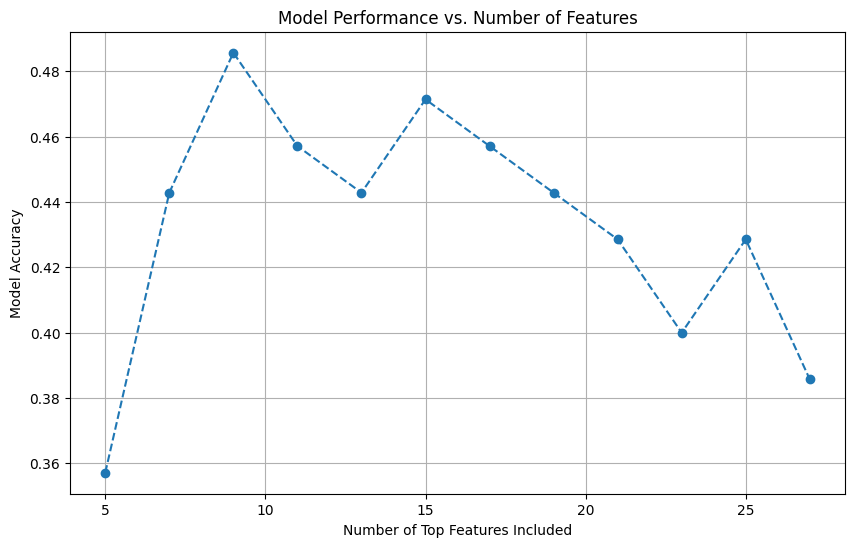

In [14]:
for k in feature_counts_to_test:
    top_k_features = ranked_features[:k]
    X_subset = features_filtered[top_k_features]
    
    X_train, X_test, y_train, y_test = train_test_split(X_subset, target, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Accuracy with top {k} features: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(feature_counts_to_test, accuracies, marker='o', linestyle='--')
plt.title('Model Performance vs. Number of Features')
plt.xlabel('Number of Top Features Included')
plt.ylabel('Model Accuracy')
plt.grid(True)
plt.show()

Using 9 features was recommended, however this did not yield favorable results in practical usage.